In [ ]:
install.packages("superml")
install.packages('pracma')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘data.table’, ‘Metrics’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df = read.csv(file = 'adult.csv', header = FALSE, strip.white=T)
names(df) = c('age','type_employer','fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income')
head(df)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# label encode education column

In [ ]:
library(superml)

Loading required package: R6



In [ ]:
value_counts = function(df, col) {
  values = df[,col, drop=FALSE]
  as.data.frame(table(values))
}

value_counts(df, 'education')

values,Freq
<fct>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [ ]:
attach(df)

In [ ]:
df$education = ifelse(education == 'Assoc-acdm', 0, df$education)
df$education = ifelse(education == 'Assoc-voc', 1, df$education)
df$education = ifelse(education == 'Bachelors', 2, df$education)
df$education = ifelse(education == 'Doctorate', 3, df$education)
df$education = ifelse(education == '1st-4th', 4, df$education)
df$education = ifelse(education == 'HS-grad', 5, df$education)
df$education = ifelse(education == '5th-6th', 6, df$education)
df$education = ifelse(education == '7th-8th', 8, df$education)
df$education = ifelse(education == '9th', 9, df$education)
df$education = ifelse(education == '10th', 10, df$education)
df$education = ifelse(education == '11th', 11, df$education)
df$education = ifelse(education == '12th', 12, df$education)
df$education = ifelse(education == 'Masters', 13, df$education)
df$education = ifelse(education == 'Preschool', 14, df$education)
df$education = ifelse(education == 'Prof-school', 15, df$education)
df$education = ifelse(education == 'Some-college', 16, df$education)


In [ ]:
value_counts(df, 'education')

values,Freq
<fct>,<int>
0,1067
1,1382
10,933
11,1175
12,433
13,1723
14,51
15,576
16,7291


# status of individual

In [ ]:
value_counts(df, 'marital')

values,Freq
<fct>,<int>
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10683
Separated,1025
Widowed,993


In [ ]:
marital_labeller = function (x) {
  # x[x=='Divorced'] = 0
  # x[x=='Widowed'] = 0
  x[x=='Separated' | x=='Widowed' | x == 'Never-married'] = 0
  x[x!=0] = 1
  x
}

df$marital = marital_labeller(df$marital)

In [ ]:
# marital_labeller = LabelEncoder$new()
# marital_labeller$fit(df$marital)
# df$marital = marital_labeller$fit_transform(df$marital)

In [ ]:
value_counts(df, 'marital')

values,Freq
<fct>,<int>
0,12701
1,19860


# create response var

In [ ]:
value_counts(df, 'income')

values,Freq
<fct>,<int>
<=50K,24720
>50K,7841


In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(pracma)


Attaching package: ‘pracma’


The following object is masked from ‘package:superml’:

    dot




In [ ]:
label_encode_income = function(x) {
  x[x == '<=50K'] = 0
  x[x == '>50K'] = 1
  x
}

df$income = label_encode_income(df$income)

In [ ]:
value_counts(df, 'income')

values,Freq
<fct>,<int>
0,24720
1,7841


# sex label encode


In [ ]:
value_counts(df, 'sex')

values,Freq
<fct>,<int>
Female,10771
Male,21790


In [ ]:
sex_labeller = LabelEncoder$new()
sex_labeller$fit(df$sex)
df$sex = sex_labeller$fit_transform(df$sex)

In [ ]:
value_counts(df, 'sex')

values,Freq
<fct>,<int>
0,21790
1,10771


# Normalize

In [ ]:
df$hr_per_week = scale(df$hr_per_week)

In [ ]:
df$hr_per_week[0:5]

[1] -0.0354289 -2.2221190 -0.0354289 -0.0354289 -0.0354289

In [ ]:
df$age = scale(df$age)

In [ ]:
df$age[0:5]

[1]  0.03067009  0.83709613 -0.04264137  1.05703050 -0.77575595

# Frequentist analysis

In [ ]:
df$marital

[1] "0" "1" "1" "1" "1" "1" "1" "1" "0" "1" "1" "1" "0" "0" "1" "1" "0" "0"
   [19] "1" "1" "1" "0" "1" "1" "1" "1" "0" "1" "1" "1" "0" "0" "1" "1" "1" "0"
   [37] "0" "1" "1" "1" "1" "1" "1" "0" "0" "1" "1" "1" "1" "0" "1" "0" "1" "1"
   [55] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "0" "0"
   [73] "1" "0" "1" "0" "1" "1" "0" "1" "0" "1" "1" "1" "1" "1" "1" "1" "0" "0"
   [91] "1" "1" "1" "1" "1" "0" "1" "1" "1" "0" "1" "1" "0" "0" "0" "1" "0" "0"
  [109] "0" "1" "0" "1" "1" "1" "0" "1" "1" "1" "1" "0" "0" "1" "0" "1" "0" "1"
  [127] "0" "1" "1" "1" "0" "0" "1" "1" "1" "1" "1" "1" "0" "1" "1" "0" "0" "0"
  [145] "0" "0" "1" "0" "1" "1" "1" "0" "0" "0" "1" "1" "0" "0" "1" "0" "1" "0"
  [163] "1" "0" "1" "1" "0" "0" "0" "0" "0" "1" "1" "0" "1" "1" "0" "0" "0" "1"
  [181] "1" "1" "0" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0"
  [199] "1" "0" "0" "0" "1" "0" "1" "0" "1" "1" "1" "0" "1" "1" "0" "1" "1" "0"
  [217] "1" "1" "1" "0" "1" "1" "0" "1" "0" "0" "1" "1" "0" "1" "0" "1" "0" "1"
  [235] "0" "1" "0" "1" "1" "0" "1" "1" "1" "0" "1" "1" "1" "0" "1" "1" "1" "1"
  [253] "0" "0" "0" "1" "0" "0" "0" "1" "1" "1" "0" "1" "1" "1" "0" "1" "0" "1"
  [271] "1" "0" "1" "0" "1" "1" "1" "0" "0" "1" "0" "1" "1" "1" "0" "1" "1" "1"
  [289] "0" "1" "1" "1" "0" "0" "0" "1" "1" "1" "0" "1" "1" "0" "1" "1" "1" "1"
  [307] "0" "0" "1" "1" "0" "1" "0" "1" "0" "0" "1" "1" "0" "0" "1" "1" "1" "0"
  [325] "1" "1" "0" "1" "1" "0" "0" "0" "0" "1" "1" "0" "0" "0" "0" "1" "0" "1"
  [343] "1" "0" "0" "0" "1" "1" "1" "0" "1" "1" "1" "1" "1" "1" "0" "1" "1" "1"
  [361] "1" "1" "1" "1" "1" "1" "1" "0" "1" "1" "0" "0" "1" "1" "0" "0" "1" "0"
  [379] "1" "1" "1" "1" "1" "1" "1" "0" "0" "1" "0" "0" "1" "0" "0" "1" "0" "1"
  [397] "1" "0" "1" "1" "0" "0" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "1" "1"
  [415] "1" "1" "1" "0" "0" "1" "1" "0" "1" "1" "0" "1" "0" "0" "1" "1" "0" "0"
  [433] "1" "1" "0" "1" "0" "0" "1" "1" "0" "1" "0" "1" "0" "0" "0" "1" "1" "0"
  [451] "0" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "1" "1" "1" "0" "1" "1" "1"
  [469] "1" "1" "0" "0" "0" "0" "1" "0" "0" "0" "0" "0" "1" "1" "0" "1" "0" "1"
  [487] "1" "1" "1" "1" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" "1" "1"
  [505] "0" "0" "0" "1" "0" "1" "1" "0" "0" "1" "1" "0" "0" "0" "0" "1" "1" "1"
  [523] "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "1" "1" "1" "1" "0" "0" "0" "0"
  [541] "1" "0" "0" "0" "1" "0" "1" "1" "0" "0" "1" "0" "0" "1" "1" "0" "1" "0"
  [559] "1" "1" "0" "1" "1" "0" "1" "0" "1" "0" "0" "1" "0" "1" "0" "1" "0" "1"
  [577] "0" "1" "0" "1" "1" "1" "1" "1" "0" "0" "0" "0" "1" "1" "1" "1" "0" "1"
  [595] "0" "0" "0" "1" "0" "0" "0" "0" "1" "1" "0" "0" "1" "0" "0" "0" "1" "0"
  [613] "1" "0" "0" "0" "1" "1" "1" "1" "0" "0" "0" "1" "1" "0" "1" "1" "1" "1"
  [631] "0" "0" "1" "1" "1" "0" "0" "1" "1" "1" "1" "1" "0" "1" "1" "0" "1" "1"
  [649] "1" "1" "0" "0" "1" "0" "0" "0" "0" "1" "1" "1" "1" "0" "0" "0" "0" "1"
  [667] "1" "1" "1" "0" "1" "0" "0" "1" "1" "0" "0" "1" "0" "0" "0" "1" "1" "0"
  [685] "0" "1" "0" "1" "0" "0" "1" "0" "1" "0" "0" "0" "0" "1" "0" "0" "0" "0"
  [703] "0" "1" "1" "1" "1" "0" "1" "0" "1" "1" "0" "1" "1" "0" "1" "0" "0" "1"
  [721] "0" "1" "0" "1" "1" "0" "1" "0" "1" "1" "0" "1" "1" "0" "1" "1" "0" "1"
  [739] "0" "1" "0" "1" "0" "0" "0" "1" "1" "0" "0" "1" "1" "0" "1" "0" "0" "0"
  [757] "1" "0" "1" "0" "0" "1" "1" "1" "0" "0" "1" "1" "1" "0" "0" "0" "1" "1"
  [775] "0" "1" "1" "1" "1" "0" "1" "0" "1" "1" "0" "1" "1" "0" "1" "0" "1" "1"
  [793] "0" "0" "1" "0" "1" "0" "0" "1" "1" "0" "0" "1" "0" "1" "1" "1" "1" "0"
  [811] "0" "0" "1" "0" "0" "1" "0" "1" "1" "1" "0" "0" "0" "0" "1" "0" "0" "0"
  [829] "0" "0" "1" "1" "0" "1" "0" "1" "1" "1" "0" "0" "0" "1" "1" "0" "1" "1"
  [847] "1" "1" "1" "0" "0" "1" "1" "0" "1" "0" "0" "1" "0" "0" "0" "1" "1" "1"
  [865] "1" "0" "0" "0" "1" "0" "1" "0" "1" "1" "1" "1" "0" "1" "1" "0" "1" "1"
  [883] "1" "1" "1" "1" "0" "1" "1" "1" "1" "0" "1" "1" "1" "1" "1" "0" "1" "1"
  [9

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
df$age = as.numeric(df$age)
df$education = as.numeric(df$education)
df$sex = as.numeric(df$sex)
df$hr_per_week = as.numeric(df$hr_per_week)
df$marital = as.numeric(df$marital)
df$income = as.numeric(df$income)

In [ ]:
mod1 = glm(income ~ age + education + sex + hr_per_week + marital, data = df, family = binomial())
summary(mod1)


Call:
glm(formula = income ~ age + education + sex + hr_per_week + 
    marital, family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1587  -0.8238  -0.3439  -0.1366   2.9926  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.034514   0.054018 -56.176  < 2e-16 ***
age          0.354969   0.016487  21.530  < 2e-16 ***
education   -0.019632   0.002954  -6.645 3.03e-11 ***
sex          0.721149   0.037124  19.425  < 2e-16 ***
hr_per_week  0.433631   0.015996  27.109  < 2e-16 ***
marital      1.829606   0.045484  40.225  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 35948  on 32560  degrees of freedom
Residual deviance: 29260  on 32555  degrees of freedom
AIC: 29272

Number of Fisher Scoring iterations: 5


Frequentist analysis shows that all parameters are signficant as their p-values are below 0.05.

# Bayesian analysis


In [ ]:
lpost.sim <- function(beta,x,y) {
  eta <- as.numeric(x %*% beta) 
  logp <- eta - log(1+exp(eta)) 
  logq <- log(1-exp(logp))
  logl <- sum(logp[y==1]) + sum(logq[y==0]) 
  return(logl - sum(beta^2)/8)
}


In [ ]:
install.packages('mcmc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(1234)
library(mcmc)
beta.init <- as.numeric(coefficients(mod1)); beta.init

[1] -3.03451383  0.35496921 -0.01963189  0.72114881  0.43363065  1.82960591

In [ ]:
out.bayes <- metrop(        
              lpost.sim,
              beta.init,
              10^3, 
              x=cbind(rep(1,nrow(df)),df$age, df$education, df$sex, df$hr_per_week, df$marital),
              y=df$income)

names(out.bayes)
out.bayes$accept

[1] "accept"       "batch"        "initial"      "final"        "accept.batch"
 [6] "initial.seed" "final.seed"   "time"         "lud"          "nbatch"      
[11] "blen"         "nspac"        "scale"        "debug"

[1] 0

In [ ]:
out.bayes <- metrop(        
            lpost.sim,beta.init,
            10^3, 
            scale=1,
            x=cbind(rep(1,nrow(df)),df$age, df$education, df$sex, df$hr_per_week, df$marital),
            y=df$income)

names(out.bayes)
out.bayes$accept

[1] "accept"       "batch"        "initial"      "final"        "accept.batch"
 [6] "initial.seed" "final.seed"   "time"         "lud"          "nbatch"      
[11] "blen"         "nspac"        "scale"        "debug"

[1] 0

In [ ]:
mcmc = function(scale) {

  out.bayes <- metrop(        
            lpost.sim,beta.init,
            10^3,
            scale=scale,
            x=cbind(rep(1,nrow(df)),df$age, df$education, df$sex, df$hr_per_week, df$marital),
            y=df$income)

  names(out.bayes)
  out.bayes$accept
    
}

mcmc_continue = function(scale) {

  out.bayes <- metrop(        
           out.bayes,beta.init,
            10^3,
            scale=scale,
            x=cbind(rep(1,nrow(df)),df$age, df$education, df$sex, df$hr_per_week, df$marital),
            y=df$income)

  names(out.bayes)
  out.bayes$accept
    
}

mcmc(5e-3)

[1] 0.322

In [ ]:
mcmc_continue(5e-3)

[1] 0.324

In [ ]:
mcmc_continue(7e-3)

[1] 0.217

In [ ]:
mcmc_continue(6.9e-3)

[1] 0.233

In [ ]:
for (i in 100:1000) {

  scale = 1/i
  tolerance = (0.26-0.23)^2
  value = 0.23

  mcmc_value = mcmc(scale)
  if((value - mcmc_value)^2<=tolerance) {
    print(scale)
    break
  }
}

Timing stopped at: 0.506 0.002 0.508



# redo

In [ ]:
value_counts = function(df, col) {
  values = df[,col, drop=FALSE]
  as.data.frame(table(values))
}

In [ ]:
df = read.csv('adult.csv', header = F, strip.white = T)
names(df) = c('age','type_employer','fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income')
attach(df)
head(df)

The following objects are masked from df (pos = 3):

    age, capital_gain, capital_loss, country, education, education_num,
    fnlwgt, hr_per_week, income, marital, occupation, race,
    relationship, sex, type_employer


The following objects are masked from df (pos = 6):

    age, capital_gain, capital_loss, country, education, education_num,
    fnlwgt, hr_per_week, income, marital, occupation, race,
    relationship, sex, type_employer


The following objects are masked from df (pos = 7):

    age, capital_gain, capital_loss, country, education, education_num,
    fnlwgt, hr_per_week, income, marital, occupation, race,
    relationship, sex, type_employer


The following objects are masked from df (pos = 8):

    age, capital_gain, capital_loss, country, education, education_num,
    fnlwgt, hr_per_week, income, marital, occupation, race,
    relationship, sex, type_employer


The following objects are masked from df (pos = 9):

    age, capital_gain, capital_loss, country, educa

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Transform the variable “education” into a numeric variable.

In [ ]:
education_labeller = function (x) {

  x[x=='Assoc-acdm'] = 1
  x[x=='Assoc-voc'] = 2
  x[x=='Bachelors'] = 3
  x[x=='1st-4th'] = 4
  x[x=='Doctorate'] = 5
  x[x=='5th-6th'] = 6
  x[x=='HS-grad'] = 7
  x[x=='7th-8th'] = 8
  x[x=='9th'] = 9
  x[x=='10th'] = 10
  x[x=='11th'] = 11
  x[x=='12th'] = 12
  
  x[x=='Masters'] = 13
  x[x=='Preschool'] = 14
  x[x=='Prof-school'] = 15
  x[x=='Some-college'] = 16
  x
}

df$education = education_labeller(df$education)

In [ ]:
value_counts(df, 'education')

values,Freq
<fct>,<int>
1,1067
10,933
11,1175
12,433
13,1723
14,51
15,576
16,7291
2,1382


## Define the response variable for the problem: a variable which takes value 0 if the indi- vidual’s earnings are less 50k USD and 1 is they are more than 50k.


In [ ]:
value_counts(df, 'income')

values,Freq
<fct>,<int>
<=50K,24720
>50K,7841


In [ ]:
income_labeller = function (x) {
  x[x=='<=50K'] = 0
  x[x=='>50K'] = 1
  x
}

df$income = income_labeller(df$income)

In [ ]:
value_counts(df, 'income')

values,Freq
<fct>,<int>
0,24720
1,7841


## Transform sex and status into two dummy variable.

In [ ]:
value_counts(df, 'marital')

values,Freq
<fct>,<int>
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10683
Separated,1025
Widowed,993


In [ ]:
marital_labeller = function (x) {
  # x[x=='Divorced'] = 0
  # x[x=='Widowed'] = 0
  x[x=='Separated' | x=='Widowed' | x == 'Never-married'] = 0
  x[x!=0] = 1
  x
}

df$marital = marital_labeller(df$marital)

In [ ]:
value_counts(df, 'marital')

values,Freq
<fct>,<int>
0,12701
1,19860


In [ ]:
value_counts(df, 'sex')

values,Freq
<fct>,<int>
Female,10771
Male,21790


In [ ]:
gender_labeller = function (x) {
  x[x=='Female'] = 0
  x[x!=0] = 1
  x
}

df$sex = gender_labeller(df$sex)

In [ ]:
value_counts(df, 'sex')

values,Freq
<fct>,<int>
0,10771
1,21790


##Apply a normalization to age and hours worked per week.

In [ ]:
df$hr_per_week = scale(df$hr_per_week)
df$age = scale(df$age)

## Run a frequentist analysis for the new dataset.

In [ ]:
install.packages("superml")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(superml)

In [ ]:

cols = c('occupation', 'relationship', 'race', 'country')
ignore = c('fnlwgt')


df = df[ , !(names(df) %in% ignore)]


In [ ]:
lbl = LabelEncoder$new()
lbl$fit(df$type_employer)
df$type_employer = lbl$fit_transform(df$type_employer)

In [ ]:
lbl = LabelEncoder$new()
lbl$fit(df$relationship)
df$relationship = lbl$fit_transform(df$relationship)

In [ ]:
lbl = LabelEncoder$new()
lbl$fit(df$race)
df$race = lbl$fit_transform(df$race)

In [ ]:
lbl = LabelEncoder$new()
lbl$fit(df$occupation)
df$occupation = lbl$fit_transform(df$occupation)

In [ ]:
lbl = LabelEncoder$new()
lbl$fit(df$country)
df$country = lbl$fit_transform(df$country)

In [ ]:
df$age <- as.numeric(df$age)
df$income <- as.numeric(df$income)
df$sex <- as.numeric(df$sex)
df$education <- as.numeric(df$education)
df$marital <- as.numeric(df$marital)

In [ ]:
head(df)

,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,1]>",<dbl>,<dbl>
1,0.03067009,0,3,13,0,0,0,0,1,2174,0,-0.0354289,0,0
2,0.83709613,1,3,13,1,1,1,0,1,0,0,-2.2221190,0,0
3,-0.04264137,2,7,9,1,2,0,0,1,0,0,-0.0354289,0,0
4,1.05703050,2,11,7,1,2,1,1,1,0,0,-0.0354289,0,0
5,-0.77575595,2,3,13,1,3,2,1,0,0,0,-0.0354289,1,0
6,-0.11595283,2,13,14,1,1,2,0,0,0,0,-0.0354289,0,0


In [ ]:
colnames(df)

[1] "age"           "type_employer" "education"     "education_num"
 [5] "marital"       "occupation"    "relationship"  "race"         
 [9] "sex"           "capital_gain"  "capital_loss"  "hr_per_week"  
[13] "country"       "income"

In [ ]:
out = glm(income ~ age + education + sex + hr_per_week + marital , data = df, family = binomial, x = T)
summary(out)


Call:
glm(formula = income ~ age + education + sex + hr_per_week + 
    marital, family = binomial, data = df, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1587  -0.8238  -0.3439  -0.1366   2.9926  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.034514   0.054018 -56.176  < 2e-16 ***
age          0.354969   0.016487  21.530  < 2e-16 ***
education   -0.019632   0.002954  -6.645 3.03e-11 ***
sex          0.721149   0.037124  19.425  < 2e-16 ***
hr_per_week  0.433631   0.015996  27.109  < 2e-16 ***
marital      1.829606   0.045484  40.225  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 35948  on 32560  degrees of freedom
Residual deviance: 29260  on 32555  degrees of freedom
AIC: 29272

Number of Fisher Scoring iterations: 5


##Write the log-posterior distribution.

In [ ]:
library(mcmc)

In [ ]:
lupost_factory = function(x, y) function(beta) {

  # print(beta)
  eta = as.numeric(x %*% beta)
  logp = ifelse(eta < 0, eta - log1p(exp(eta)), - log1p(exp(- eta)))
  logq = ifelse(eta < 0, - log1p(exp(eta)), - eta - log1p(exp(- eta)))
  logl = sum(logp[y == 1]) + sum(logq[y == 0])
  return (logl - sum(beta^2) / 8)

}

lupost = lupost_factory(out$x, out$y)

In [ ]:
lupost

function(beta) {

  # print(beta)
  eta = as.numeric(x %*% beta)
  logp = ifelse(eta < 0, eta - log1p(exp(eta)), - log1p(exp(- eta)))
  logq = ifelse(eta < 0, - log1p(exp(eta)), - eta - log1p(exp(- eta)))
  logl = sum(logp[y == 1]) + sum(logq[y == 0])
  return (logl - sum(beta^2) / 8)

}
<bytecode: 0x5591ac190e78>
<environment: 0x5591aca5d888>

In [ ]:
set.seed(42)

In [ ]:
beta.init = as.numeric(coefficients(out))
beta.init

[1] -3.03451383  0.35496921 -0.01963189  0.72114881  0.43363065  1.82960591

In [ ]:
out = metrop(lupost, beta.init, 1e3, scale = 5e-3)
out$accept

[1] 0.275

In [ ]:
out = metrop(out, scale = 5e-3 * (1 + 3/4))
out$accept

[1] 0.156

In [ ]:
out = metrop(out, scale = 6e-3)
out$accept

[1] 0.245

In [ ]:
out = metrop(out, scale = 6.75e-3)
out$accept

[1] 0.215

In [ ]:
out = metrop(out, scale = 6.6e-3)
out$accept

[1] 0.227

In [ ]:
 t.test(out$accept.batch)$conf.int

[1] 0.2009927 0.2530073
attr(,"conf.level")
[1] 0.95

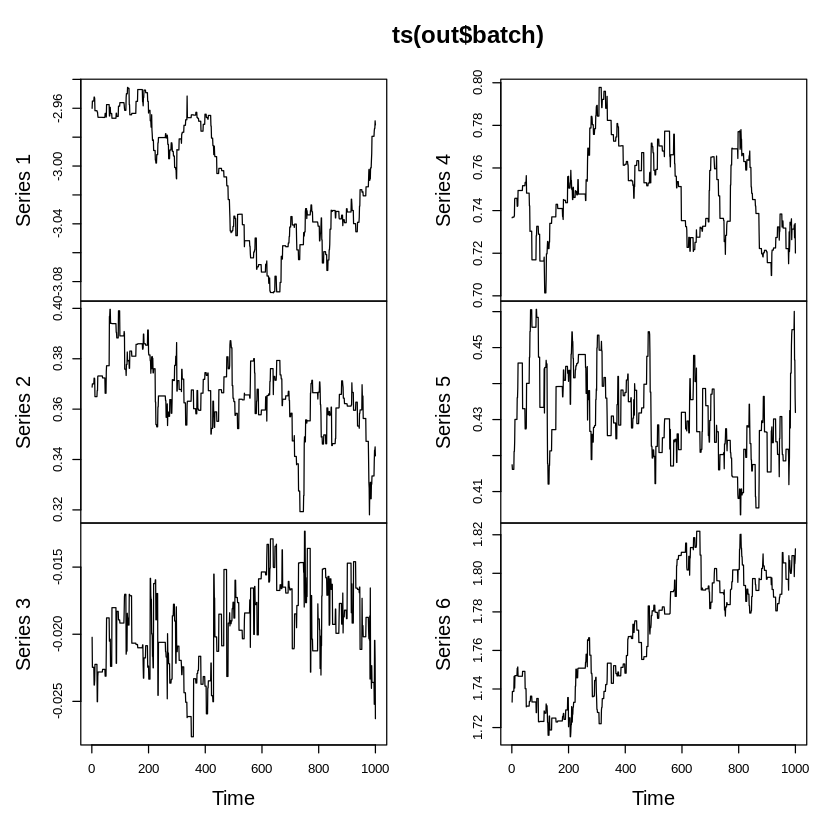

In [ ]:
plot(ts(out$batch))

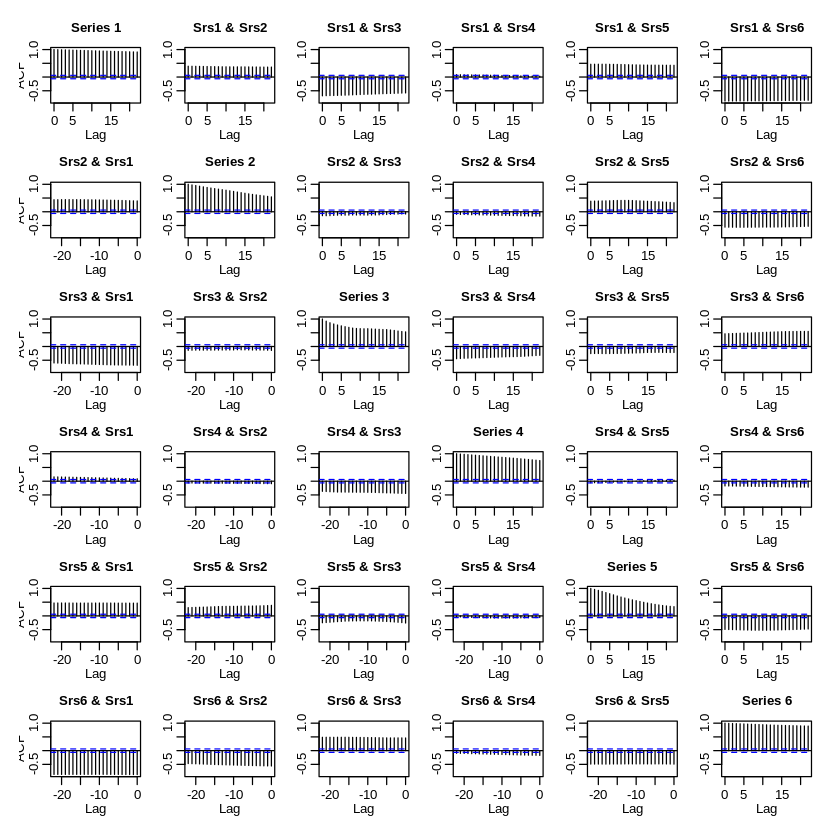

In [ ]:
 acf(out$batch)